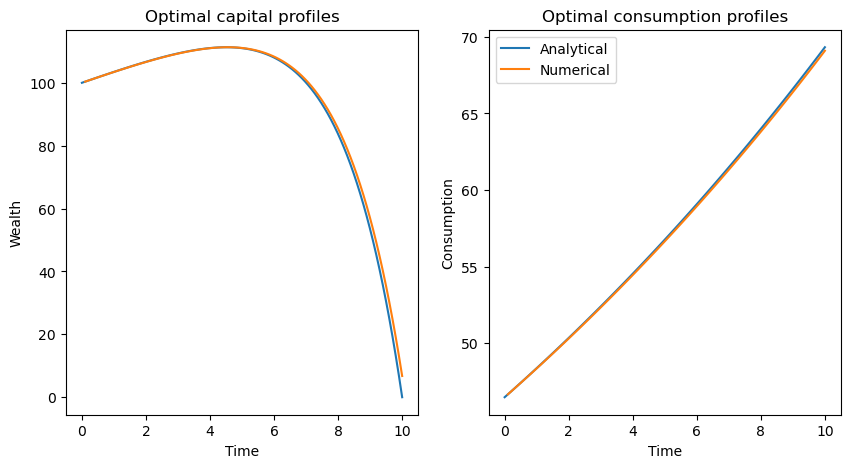

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp

rf = 0.5
rho = 0.1
gamma = 10
n = 100
w0 = 100
wT = 0
T = 10
dt = T / n

# analytical solution 
c0 = -np.exp(rf*T)*(rf - (rf-rho)/gamma)*w0 / (np.exp((rf-rho)/gamma*T)-np.exp(rf*T))
ct = lambda t: np.exp((rf-rho)/gamma*t)*c0
wt = lambda t:( np.exp(rf*t)*(rf - (rf-rho)/gamma)*w0 + (np.exp((rf-rho)/gamma*t)-np.exp(rf*t))*c0) / (rf - (rf-rho)/gamma)
t = np.linspace(0,T,100)

# finite difference method
D1 = sp.diags([-1, 0, 1], [-1, 0, 1], shape=(n-1, n-1)).toarray()/(2*dt)
D2 = sp.diags([1, -2, 1], [-1, 0, 1], shape=(n-1, n-1)).toarray()/dt**2
A = (gamma*rf + rf - rho)*D1 - gamma*D2 - (rf - rho)*rf*np.eye(n-1) 
A = sp.csr_matrix(A)
b = np.zeros((n-1,1))
b[0] = -(-(gamma*rf + rf - rho)/(2*dt) - gamma/(dt**2))*w0
b[-1] = -(-(gamma*rf + rf - rho)/(2*dt) - gamma/(dt**2))*wT
w = sp.linalg.spsolve(A, b)
w = w.reshape((-1,1))
dw = D1@w
dw[0] = (w[1]-w0)/(2*dt)
dw[-1] = (wT-w[-2])/(2*dt)
c = rf*w - dw

fig, axs = plt.subplots(1,2,figsize=(10,5))
axs[0].plot(t,wt(t),label = "Analytical")
axs[0].plot(np.linspace(dt,T,n-1),w,label = "Numerical")
axs[0].set_title("Optimal capital profiles")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Wealth")
axs[1].plot(t,ct(t),label = "Analytical")
axs[1].plot(np.linspace(dt,T,n-1),c, label = "Numerical")
axs[1].set_title("Optimal consumption profiles")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Consumption")
plt.legend()
plt.show()